## Assignment 30 - PCA Iris data

Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

Load data

In [3]:
iris = datasets.load_iris()

In [4]:
data= iris.data

In [ ]:
data.shape

In [6]:
data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## Eigen-Decomposition

1.Normalize columns of A so that each feature has zero mean

In [7]:
#Step1:
mu=np.mean(data, axis=0)
A= data-mu
print(np.mean(A,axis=0))

[-1.12502600e-15 -6.75015599e-16 -3.23889064e-15 -6.06921920e-16]


2.Compute simple covarience matrix sigma = {A.T}/{m-1}

In [8]:
#Step2:
m,n = A.shape
sigma = (A.T@A)/(m-1)
print(sigma)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


3.Perform eigen-decomposition of sigma using np.linalg.eig

In [9]:
# Step 3:
l,x = np.linalg.eig(sigma)
print(l)
print(x)

[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


4.Compress by ordering evectors according to largect evalues

In [10]:
# Step 4
Acomp = A@x[:,:3]
print(Acomp[:5,:])

[[-2.68420713 -0.32660731 -0.02151184]
 [-2.71539062  0.16955685 -0.20352143]
 [-2.88981954  0.13734561  0.02470924]
 [-2.7464372   0.31112432  0.03767198]
 [-2.72859298 -0.33392456  0.0962297 ]]


5.Reconstruct from compressed version

In [11]:
# Step 5
Arec = A@ x[:,:3]@ x[:,:3].T
print(Arec[:5,:]+mu)

[[5.09968079 3.50032609 1.40048267 0.19924425]
 [4.86840068 3.03228058 1.44778117 0.12518657]
 [4.69387555 3.20625649 1.30926076 0.18549996]
 [4.62409716 3.07538332 1.46356281 0.25705157]
 [5.02002788 3.57954033 1.36971595 0.24741729]]


## Using Sklearn PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]


## Converted 3D data

In [15]:
print(pca.transform(data)[:5,:])

[[-2.68420713  0.32660731 -0.02151184]
 [-2.71539062 -0.16955685 -0.20352143]
 [-2.88981954 -0.13734561  0.02470924]
 [-2.7464372  -0.31112432  0.03767198]
 [-2.72859298  0.33392456  0.0962297 ]]


## Plot 3D chart

In [16]:
import seaborn as sns 
sns.set()

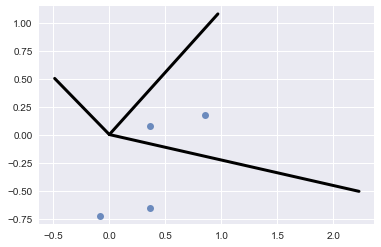

In [25]:
plt.plot(x[:,0],x[:,1],'o',alpha=0.8)
for length,vector in zip (pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0,v[0]],[0,v[1]],'-k',lw=3)


plt.axis('equal');